# read file

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('20210103_hundenamen.csv')
df.head(15)

,HUNDENAME,GEBURTSJAHR_HUND,GESCHLECHT_HUND
0,Ituma,2011,w
1,"""Bo"" Bendy of Treegarden",2020,m
2,"""Bobby"" Lord Sinclair",2009,m
3,"""Buddy"" Fortheringhay's J.",2011,m
4,"""Fly"" Showring i fly for you",2015,w
5,"""Pino"" Ami du soleil",2010,m
6,"""Zappalla II"" Kora v. Tüfibach",2011,w
7,A great Dream Kajsa of Moss-La,2019,w
8,A-Diana,2006,w
9,AISHA von der Mark,2020,w


## get unique name set except 'Luca

In [3]:
names = set(df[df['HUNDENAME'] != 'Luca']['HUNDENAME'])


# The Levenshtein Distance
<div>
   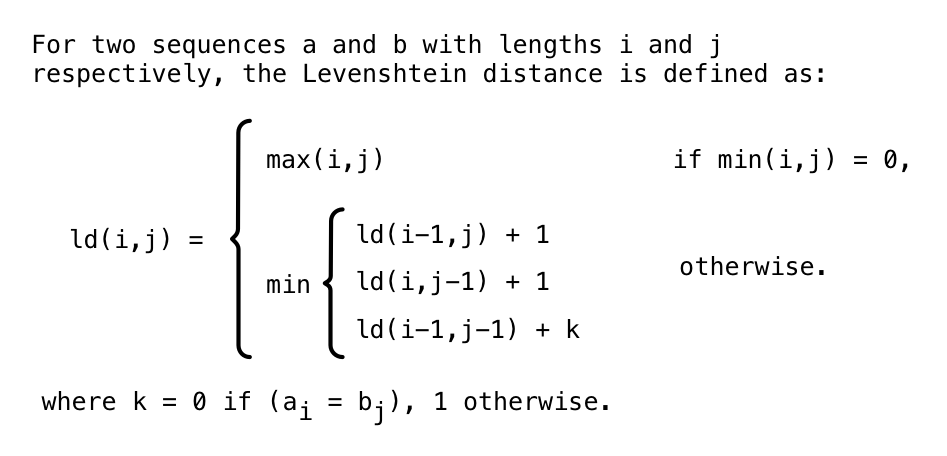
</div>


In [4]:
def levenshtein_dist(str1, str2):
    m = len(str1)+1
    n = len(str2)+1
    distance = np.zeros((m,n), dtype=int)
    
    for i in range(1, m):
        for j in range(1,n):
            distance[i][0] = i
            distance[0][j] = j
    for j in range(1,n):
        for i in range(1,m):
            if str1[i-1]==str2[j-1]:
                ans = 0
            else:
                ans = 1
            distance[i][j] = min(distance[i-1][j]+1,
                                distance[i][j-1]+1,
                                distance[i-1][j-1]+ans)
    return distance[m-1][n-1]

In [5]:
res = []
for name in names:
    if levenshtein_dist('Luca', name) == 1:
        res.append(name)
        
res

['Luba',
 'Luce',
 'Lucas',
 'Lucia',
 'Lua',
 'Yuca',
 'Cuca',
 'Lucy',
 'Luna',
 'Lula',
 'Lupa',
 'Luma']